### KNN (K-Nearest Neighbors Classification)

In [87]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

# Seaborn is a nice package for plotting, but you have to use pip to install
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier

In [88]:
# TODO
header=['id number','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion',
        'Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']

#### Load in the Wisconsin breast cancer dataset. The attributes below will be the columns of the dataset.

Attribute Information: (class attribute has been moved to last column)

      Attribute                     Values
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
   10. Mitoses                       1 - 10
   11. Class:                        (2 for benign, 4 for malignant)

In [89]:
df = pd.read_csv('../../assets/datasets/breast-cancer-wisconsin.csv' , names =header, na_values='?')
df.dropna(inplace=True)
df.head()

,id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [90]:
print 'The breast cancer data set contains: %r rows and %r columns' % (df.shape[0],df.shape[1])

The breast cancer data set contains: 683 rows and 11 columns


In [91]:
df['Bare Nuclei'].value_counts()

1.0     402
10.0    132
5.0      30
2.0      30
3.0      28
8.0      21
4.0      19
9.0       9
7.0       8
6.0       4
Name: Bare Nuclei, dtype: int64

In [92]:
df.columns

Index([u'id number', u'Clump Thickness', u'Uniformity of Cell Size',
       u'Uniformity of Cell Shape', u'Marginal Adhesion',
       u'Single Epithelial Cell Size', u'Bare Nuclei', u'Bland Chromatin',
       u'Normal Nucleoli', u'Mitoses', u'Class'],
      dtype='object')

The column names are taken from the dataset info file. Create an array
with the column names and assign them as the header when loading the
csv.

The class field is coded as "2" for benign and "4" as malignant. 
- Let's recode this to a binary variable for classification, with "1" as malign and "0" as benign.

In [93]:
# TODO
df['Class']=df['Class'].apply(lambda x: 1 if x==4 else 0)

In [94]:
# Convert few columns from float to integers
#df["Bare Nuclei"] = df["Bare Nuclei"].astype(int)

In [95]:
df.head(10)

,id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0
5,1017122,8,10,10,8,7,10.0,9,7,1,1
6,1018099,1,1,1,1,2,10.0,3,1,1,0
7,1018561,2,1,2,1,2,1.0,3,1,1,0
8,1033078,2,1,1,1,2,1.0,1,1,5,0
9,1033078,4,2,1,1,2,1.0,2,1,1,0


In [96]:
df['Class'].value_counts()

0    444
1    239
Name: Class, dtype: int64

In [97]:
df.dtypes


id number                        int64
Clump Thickness                  int64
Uniformity of Cell Size          int64
Uniformity of Cell Shape         int64
Marginal Adhesion                int64
Single Epithelial Cell Size      int64
Bare Nuclei                    float64
Bland Chromatin                  int64
Normal Nucleoli                  int64
Mitoses                          int64
Class                            int64
dtype: object

Look at the data using seaborn's "pairplot" function. First put the dataset into "long" format, which seaborn requires for it's plotting functions:

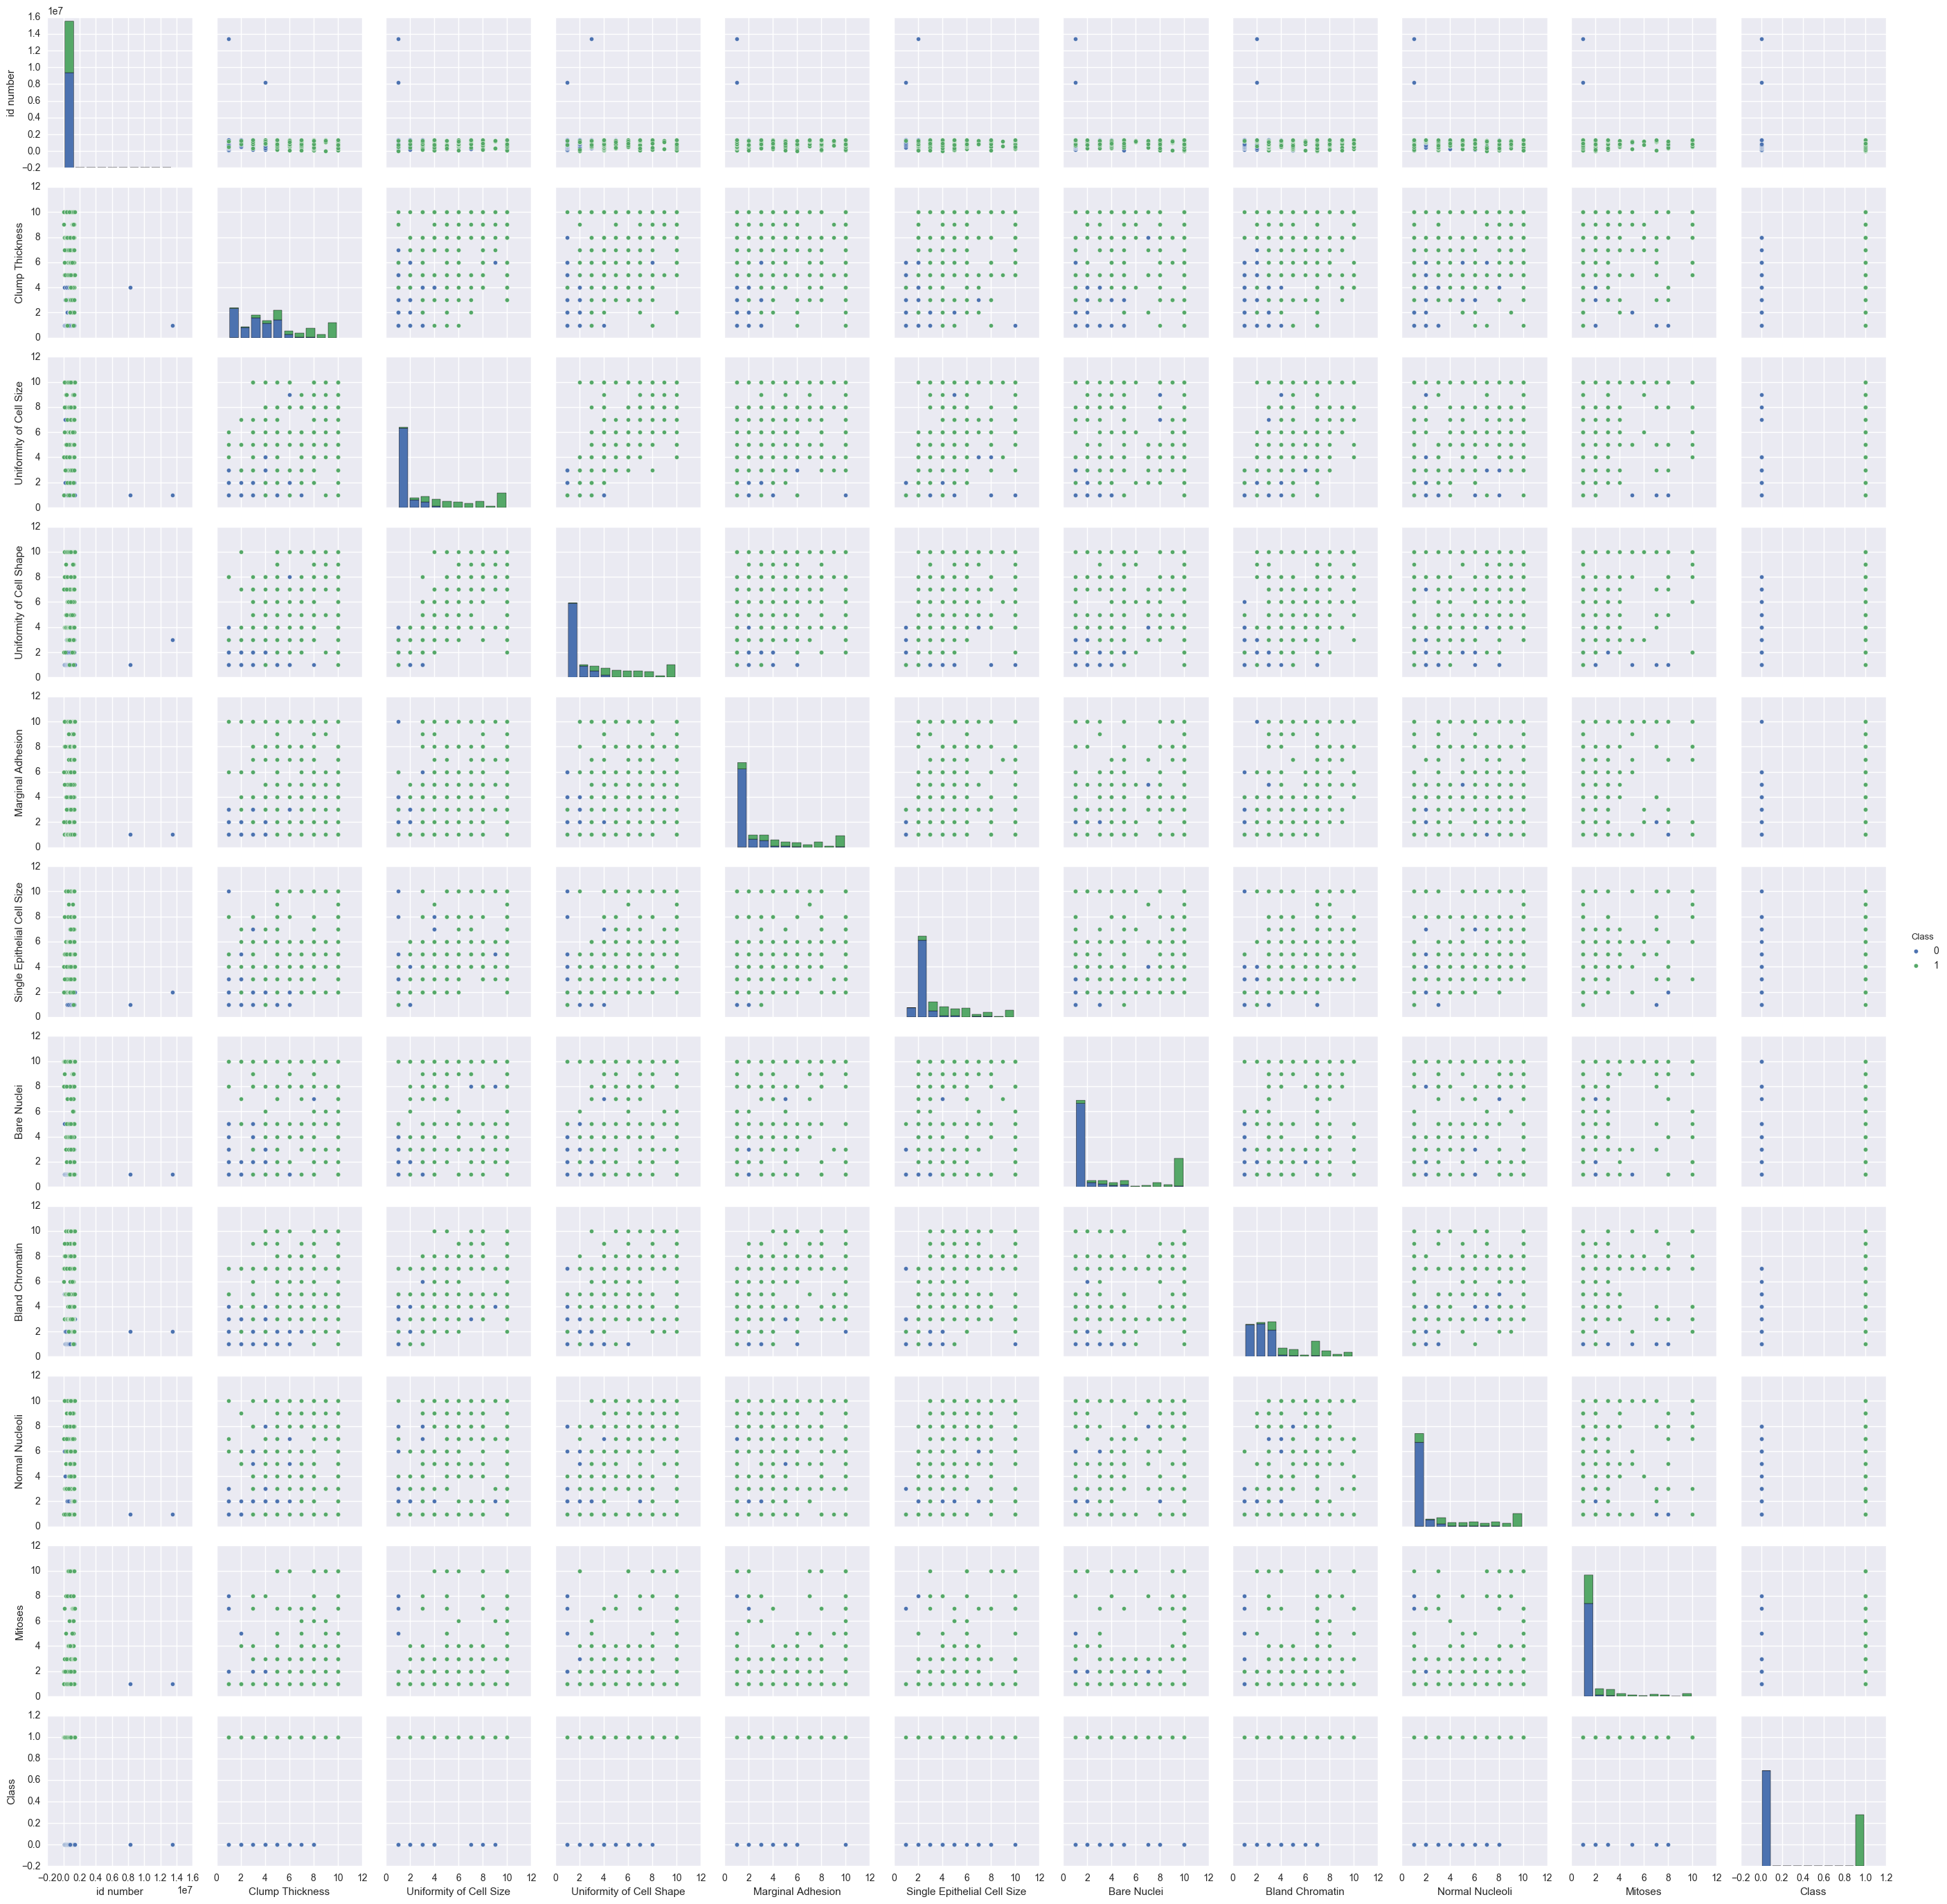

In [98]:
# TODO
sns.pairplot(df ,hue='Class')
#palette =(1:'gold', 0:'red'))

In [99]:
df.corr()

,id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
id number,1.000000,-0.056350,-0.041396,-0.042221,-0.069630,-0.048644,-0.099248,-0.061966,-0.050699,-0.037972,-0.084701
Clump Thickness,-0.056350,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957,0.714790
Uniformity of Cell Size,-0.041396,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755,0.820801
Uniformity of Cell Shape,-0.042221,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258,0.821891
Marginal Adhesion,-0.069630,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121,0.418898,0.706294
Single Epithelial Cell Size,-0.048644,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926,0.480583,0.690958
Bare Nuclei,-0.099248,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
Bland Chromatin,-0.061966,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602,0.346011,0.758228
Normal Nucleoli,-0.050699,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000,0.433757,0.718677
Mitoses,-0.037972,0.350957,0.460755,0.441258,0.418898,0.480583,0.339210,0.346011,0.433757,1.000000,0.423448


It's very useful and recommended to look at the correlation matrix:

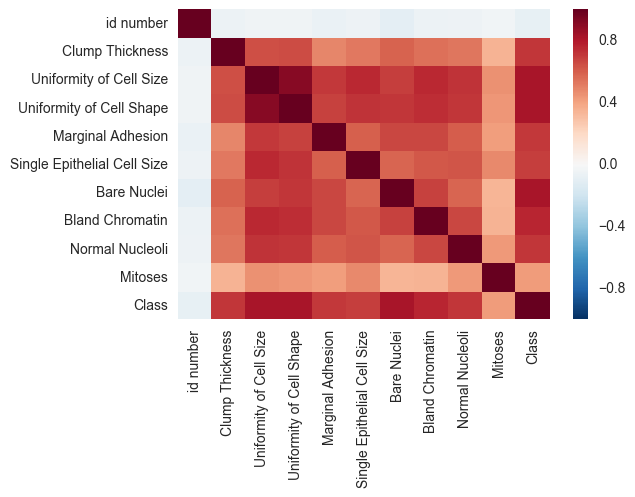

In [100]:
# TODO
sns.heatmap(df.corr())

Most of these predictors are highly correlated with the "class" variable. This is already an indication that our classifier is very likely to perform well.

We can plot out in detail how the classes distribute across the variables using the very useful pairplot() function from seaborn:

In [101]:
# TODO
#Consider using .ix for selecting columns for x
#df.iloc[:,1:-1]
from sklearn.neighbors import KNeighborsClassifier
kval = 5
model=KNeighborsClassifier(n_neighbors = kval, n_jobs = -1)
X = df[[ x for x in header if x not in ['id number','Class']]]
y= df['Class']

In [102]:
from sklearn.cross_validation import cross_val_score
acc =cross_val_score(model, X, y,cv=7)
print acc

[ 0.92929293  0.97959184  0.93877551  0.97938144  0.98969072  0.98969072
  0.97938144]


Let's see how the kNN classifier performs on the dataset (using cross-validation).

We are going to set some parameters in the classifier constructor. Some clarification below:

1. **n_neighbors** specifies how many neighbors will vote on the class
2. **weights** uniform weights indicate that all neighbors have the same weight
3. **metric** and **p** when distance is minkowski (the default) and p == 2 (the default), this is equivalent to the euclidean distance metric

Also load scikit's handy cross-validation module and perform the crossval

In [103]:
# TODO

In [104]:
# TODO

- As you can see the accuracy is very high with 5 neighbors. [NOTE: ask what might be wrong with accuracy as a metric here].

- Let's see what it's like when we use only 1 neighbor:

In [105]:
# TODO

- Even with 1 neighbor we do quite well at predicting the malignant observations.

- Now fit a kNN classifier with n_neighbors=5 using just 'clump thickness' and 'cell size uniformity' as variables.

- Plot the points and the colors of where the classifier decides between malignant vs. benign. The size of the circles denotes the number of observations at that point. The hue of the circle denotes the mixture of class labels between 0 and 1.

In [106]:
# TODO